In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import joblib

n_iter = 5
n_trial = 5

def ci(y, N_TRIALS):
    return 1.96 * y.std(axis=0) / np.sqrt(N_TRIALS)


In [ ]:
12 + 8*6 = 60
24 + 6*6 = 60
36 + 4*6 = 60
48 + 2*6 = 60

1. confirm new simulated problem
2. develop the better model

1. waiting on regeants
2. we are okay with the flexible sampling
3. use set of sets to show results


(0.0, 8.0)

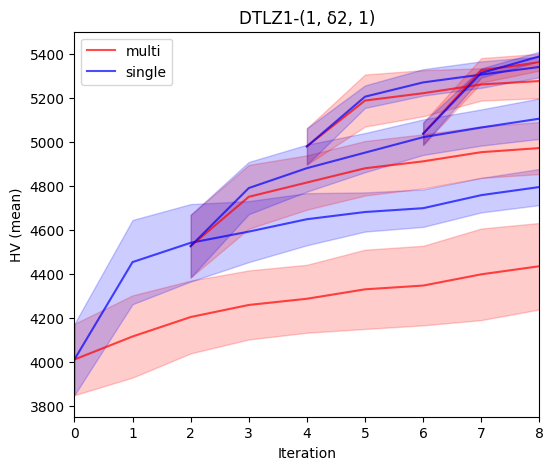

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

path = os.getcwd()+'/sampling/'

max_iter = 8
n_trial = 5

for n_iter, run in zip([8, 6, 4, 2], ['run1', 'run2', 'run3', 'run4']):
    for taskalgo, color in zip([('multi','qnehvi'), ('single','qnehvi')], ['r', 'b']):
    
        task_type, algo = taskalgo
        results = joblib.load(f'{path}DTLZ1-results-{task_type}-{algo}-{run}')
        #loss = joblib.load(f'{path}DTLZ1-losses-{task_type}-{algo}-{train_type}-run1')
    
        results_np = results.reshape(n_trial, n_iter+1, 3).mean(axis=2)
    
        ax.plot(np.arange(n_iter+1)+(max_iter-n_iter),
                results_np.mean(axis=0),
                label=f'{task_type}', color=color, linewidth=1.5, alpha=0.7)
        
        ax.fill_between(np.arange(n_iter+1)+(max_iter-n_iter),
                        results_np.mean(axis=0)-ci(results_np, n_trial), 
                        results_np.mean(axis=0)+ci(results_np, n_trial),
                        color=color, alpha=0.2)

    if run == 'run1':
        ax.legend()

ax.set(xlabel='Iteration', ylabel='HV (mean)', title='DTLZ1-(1, δ2, 1)') 
ax.set_ylim([3750, 5500])
ax.set_xlim([0, 8])

(0.0, 8.0)

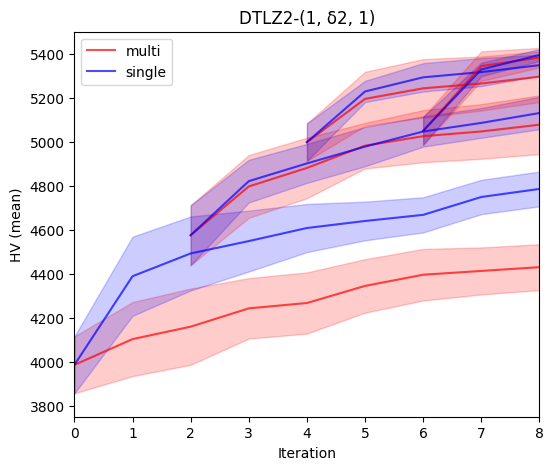

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

path = os.getcwd()+'/loss/'

max_iter = 8
n_trial = 5

for n_iter, run in zip([8, 6, 4, 2], ['run1', 'run2', 'run3', 'run4']):
    for taskalgo, color in zip([('multi','qnehvi'), ('single','qnehvi')], ['r', 'b']):
    
        task_type, algo = taskalgo
        results = joblib.load(f'{path}DTLZ2-results-{task_type}-{algo}-{run}')
        #loss = joblib.load(f'{path}DTLZ1-losses-{task_type}-{algo}-{train_type}-run1')
    
        results_np = results.reshape(n_trial, n_iter+1, 3).mean(axis=2)
    
        ax.plot(np.arange(n_iter+1)+(max_iter-n_iter),
                results_np.mean(axis=0),
                label=f'{task_type}', color=color, linewidth=1.5, alpha=0.7)
        
        ax.fill_between(np.arange(n_iter+1)+(max_iter-n_iter),
                        results_np.mean(axis=0)-ci(results_np, n_trial), 
                        results_np.mean(axis=0)+ci(results_np, n_trial),
                        color=color, alpha=0.2)

    if run == 'run1':
        ax.legend()

ax.set(xlabel='Iteration', ylabel='HV (mean)', title='DTLZ2-(1, δ2, 1)') 
ax.set_ylim([3750, 5500])
ax.set_xlim([0, 8])

(0.0, 8.0)

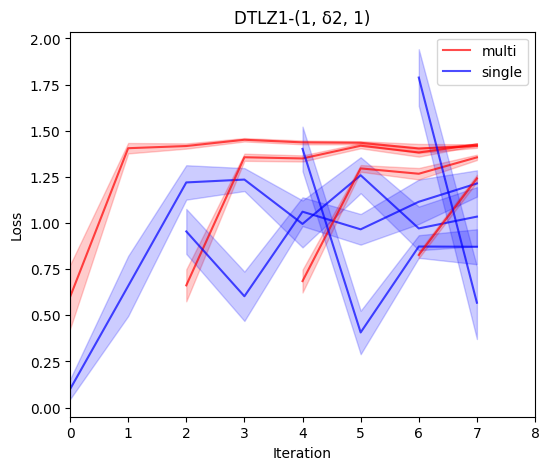

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

path = os.getcwd()+'/loss/'

max_iter = 8
n_trial = 5

for n_iter, run in zip([8, 6, 4, 2], ['run1', 'run2', 'run3', 'run4']):
    for taskalgo, color in zip([('multi','qnehvi'), ('single','qnehvi')], ['r', 'b']):
    
        task_type, algo = taskalgo
        loss = joblib.load(f'{path}DTLZ1-losses-{task_type}-{algo}-{run}')
        
        ax.plot(np.arange(n_iter)+(max_iter-n_iter),
                loss.mean(axis=0),
                label=f'{task_type}', color=color, linewidth=1.5, alpha=0.7)
        
        ax.fill_between(np.arange(n_iter)+(max_iter-n_iter),
                        loss.mean(axis=0)-ci(loss, n_trial), 
                        loss.mean(axis=0)+ci(loss, n_trial),
                        color=color, alpha=0.2)

    if run == 'run1':
        ax.legend()

ax.set(xlabel='Iteration', ylabel='Loss', title='DTLZ1-(1, δ2, 1)') 
#ax.set_ylim([3750, 5500])
ax.set_xlim([0, 8])

(0.0, 8.0)

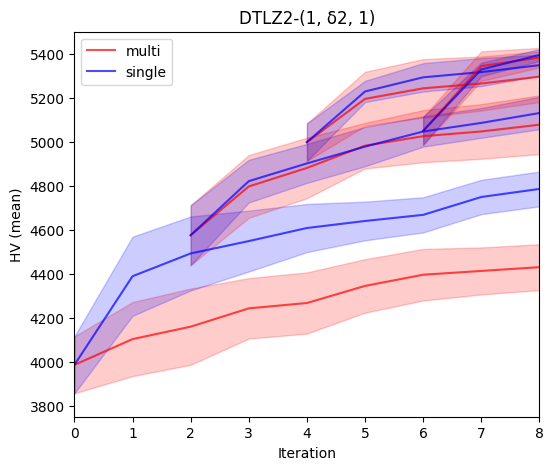

[Text(0.5, 0, 'Iteration'),
 Text(0, 0.5, 'HV (task 2)'),
 Text(0.5, 1.0, 'DTLZ1-(1, δ2, 1)')]

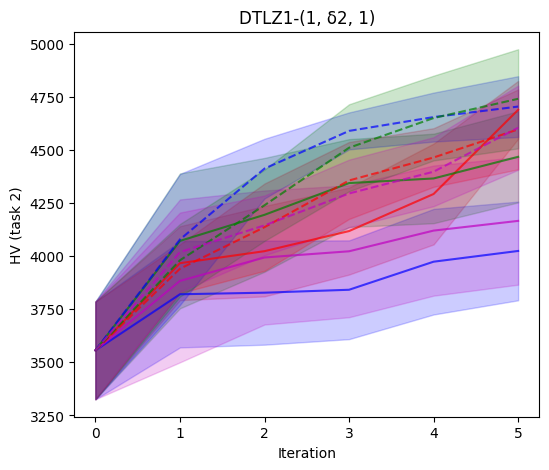

In [118]:
results1, results2, results3, results4, results5, results6, results7, results8 = [], [], [], [], [], [], [], []


for taskalgo, results_list in zip([('multi','egbo'), ('multi','qnehvi'),
                                   ('multi','qnparego'), ('multi','qucb'),
                                   ('single','egbo'), ('single','qnehvi'),
                                   ('single','qnparego'), ('single','qucb'),
                                  ],
                                 
                                 [results1, results2, results3, results4,
                                  results5, results6, results7, results8]
                                 ):

    task, algo = taskalgo
    results_list.append(joblib.load(f"{os.getcwd()}/results1/DTLZ1-results-{task}-{algo}-run1"))
    #results_list.append(joblib.load(f"results old/{task}-{algo}-run2"))


fig, ax = plt.subplots(1, 1, figsize=(6, 5))

for results, label, color, linestyle in zip(
    [results1, results2, results3, results4, results5, results6, results7, results8],
    ["MT-EGBO", "MT-qNEHVI", "MT-qNParEGO", "MT-qUCB",
     "ST-EGBO", "ST-qNEHVI", "ST-qNParEGO", "ST-qUCB",],
    ['r', 'b', 'g', 'm', 'r', 'b', 'g', 'm'],
    ['solid', 'solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed', 'dashed']
):


    results_np = np.array(results).reshape(n_trial, n_iter+1, 3)[:,:,1]

    ax.plot(np.arange(n_iter+1),
            results_np.mean(axis=0),
            c=color, linestyle=linestyle,
            label=f'{label}', linewidth=1.5, alpha=0.7)

    ax.fill_between(np.arange(n_iter+1),
                    results_np.mean(axis=0)-ci(results_np, n_trial), 
                    results_np.mean(axis=0)+ci(results_np, n_trial),
                    color=color, alpha=0.2)

#ax.legend()
ax.set(xlabel='Iteration', ylabel='HV (task 2)', title='DTLZ1-(1, δ2, 1)')

[Text(0.5, 0, 'Iteration'),
 Text(0, 0.5, 'HV (task 3)'),
 Text(0.5, 1.0, 'DTLZ1-(1, δ2, 1)')]

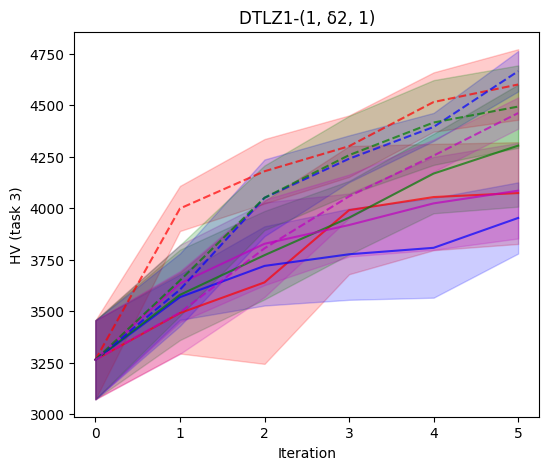

In [119]:
results1, results2, results3, results4, results5, results6, results7, results8 = [], [], [], [], [], [], [], []


for taskalgo, results_list in zip([('multi','egbo'), ('multi','qnehvi'),
                                   ('multi','qnparego'), ('multi','qucb'),
                                   ('single','egbo'), ('single','qnehvi'),
                                   ('single','qnparego'), ('single','qucb'),
                                  ],
                                 
                                 [results1, results2, results3, results4,
                                  results5, results6, results7, results8]
                                 ):

    task, algo = taskalgo
    results_list.append(joblib.load(f"{os.getcwd()}/results1/DTLZ1-results-{task}-{algo}-run1"))
    #results_list.append(joblib.load(f"results old/{task}-{algo}-run2"))


fig, ax = plt.subplots(1, 1, figsize=(6, 5))

for results, label, color, linestyle in zip(
    [results1, results2, results3, results4, results5, results6, results7, results8],
    ["MT-EGBO", "MT-qNEHVI", "MT-qNParEGO", "MT-qUCB",
     "ST-EGBO", "ST-qNEHVI", "ST-qNParEGO", "ST-qUCB",],
    ['r', 'b', 'g', 'm', 'r', 'b', 'g', 'm'],
    ['solid', 'solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed', 'dashed']
):


    results_np = np.array(results).reshape(n_trial, n_iter+1, 3)[:,:,2]

    ax.plot(np.arange(n_iter+1),
            results_np.mean(axis=0),
            c=color, linestyle=linestyle,
            label=f'{label}', linewidth=1.5, alpha=0.7)

    ax.fill_between(np.arange(n_iter+1),
                    results_np.mean(axis=0)-ci(results_np, n_trial), 
                    results_np.mean(axis=0)+ci(results_np, n_trial),
                    color=color, alpha=0.2)

#ax.legend()
ax.set(xlabel='Iteration', ylabel='HV (task 3)', title='DTLZ1-(1, δ2, 1)')